## Measure of Dispersion

IQR is a relatively rare measure of the dispersion of values around the center of a distribution. The most widely-used are:

* Variance,
* Standard deviation, and
* Standard error.

**Variance** (denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it:
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

(The astute follower of the *Machine Learning Foundations* series may notice that this formula is the same as mean-squared-error cost, except $x_i$ is being compared to the mean $\mu$ instead of a predicted value $\hat{x}_i$.)

(Technically speaking, we should divide by $n$-1 with a sample of data, but with the large datasets typical of machine learning, it's a negligible difference. If $n$ were equal to a small number like 8 then it would matter.)

(Also technically speaking, the variance of a sample is typically denoted with $s^2$ as opposed to the Greek $\sigma^2$, akin to how $\bar{x}$ denotes the mean of a sample while the Greek $\mu$ is reserved for population mean.)

As an example let's calculate the variance of the PDF `x` from earlier:

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x = st.skewnorm.rvs(10, size=1000)

In [5]:
xbar = np.mean(x)

xbar

np.float64(0.7832953050856645)

In [6]:
squared_differences = [(x_i - xbar)**2 for x_i in x]
squared_differences[:10]

[np.float64(0.038357296644034804),
 np.float64(0.26418508322805107),
 np.float64(0.292771781203173),
 np.float64(0.09515905149703945),
 np.float64(0.20107889814631363),
 np.float64(0.2380683563066718),
 np.float64(0.013517501334494387),
 np.float64(1.2692108799666457),
 np.float64(0.15024989048436893),
 np.float64(0.2090892198950378)]

In [7]:
sigma_squared = sum(squared_differences) / len(x)
sigma_squared

np.float64(0.32707623742907266)

We have a built in function in numpy:

In [8]:
np.var(x)

np.float64(0.32707623742907244)

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$

In [9]:
sigma = sigma_squared ** (1/2)
sigma

np.float64(0.5719057941908551)

In [10]:
np.std(x)

np.float64(0.5719057941908549)

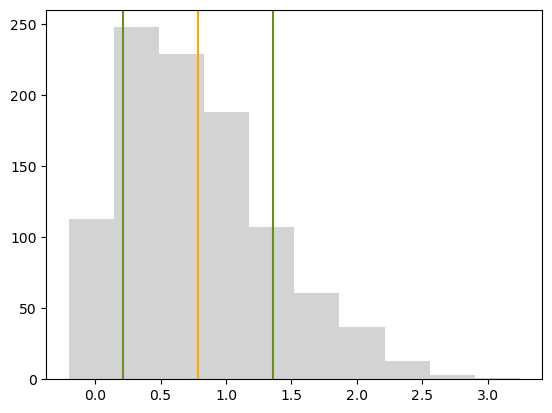

In [11]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar + sigma, color='olivedrab')
plt.axvline(x = xbar - sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_{\bar{x}}$:
$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $$

In [12]:
sigma / (len(x))**(1/2)

np.float64(0.01808524916690596)

In [13]:
st.sem(x) # standard error - defaults to 1 degree of freedom (n-1), which can be ignored with larger data sets

np.float64(0.018094298579114435)

In [14]:
st.sem(x, ddof=0) # 0 degree of freedom

np.float64(0.018085249166905952)

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.